In [52]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
# Here we download and install locally two libraries:
# -  gdown is a library similar to curl and wget but it allows to download big files from google drive
#    two previous apps have problem with this because of google warning that file is too big to scan it with antivirus.
# -  httpimport allows to import modules from web using HTTP/HTTPS.
!pip install -q gdown httpimport
# If you don't use virtual env and you work on own computer, then you may want to install these packages
# system wide, in such case you should use: 'sudo pip install gdown httpimport' in your shell.
# Download MNIST data set, which we will be use in problem 5..
# If you have installed gdown locally, then you probably want to change here 'gdown' to '~/.local/bin/gdown',
# because ~/.local/bin is default directory for packages installed locally by pip.
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

In [53]:
import httpimport
import numpy as np
import scipy.stats as sstats
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
from sklearn import datasets
from tqdm.auto import tqdm
with httpimport.github_repo('janchorowski', 'nn_assignments', 
                            module='common', branch='nn18'):
     from common.plotting import plot_mat

sns.set_style('whitegrid')

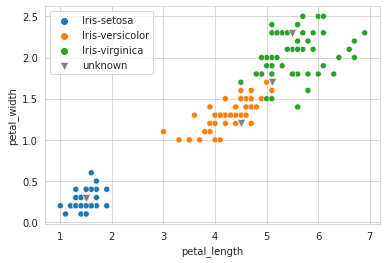

In [54]:
iris_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_df = pd.read_csv(iris_url, header=None)
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
unknown_df = pd.DataFrame(
    [[1.5, 0.3, 'unknown'],
     [4.5, 1.2, 'unknown'],
     [5.1, 1.7, 'unknown'],
     [5.5, 2.3, 'unknown']],
     columns=['petal_length', 'petal_width', 'target'])

sns.scatterplot(x='petal_length', y='petal_width', hue='target', data=iris_df)
sns.scatterplot(x='petal_length', y='petal_width', color='gray', marker='v',
                label='unknown', s=70, data=unknown_df)

In [55]:
ag = np.array([[2,7,6],[9,5,1],[4,3,8]])
print(ag)


close = np.argsort(ag)
targets = np.array(['pizda', 'cwel', 'kurwa'])
targets2= np.array([2, 7, 5, 6, 5, 3, 3])

tar = np.array([2, 6, 5, 5, 4, 2, 3])
git = np.where(tar!=targets2)
print(git[0])


[[2 7 6]
 [9 5 1]
 [4 3 8]]
[1 3 4 5]


In [56]:
a = np.arange(0, 151, 1)
b = np.random.randint(0, 151, 150)
c = np.setdiff1d(a, b)

print(c.size)

59


In [57]:
def dist2(X, Y):
  d = (X**2).sum(axis=1)[np.newaxis].T - 2 * X.dot(Y.T) + (Y**2).sum(axis=1)[np.newaxis]
  return np.sqrt(d)
def dist(X, Y):
  dists = -2 * np.dot(X, Y.T) + np.sum(Y ** 2, axis=1)
  return dists
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
print(iris_x[:5])
data_a = iris_x[:50]
data_b = iris_x[50:]
a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 4, 7])
print(data_a.shape, data_b.shape)



[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
(50, 2) (100, 2)


In [58]:
def KNN(train_X, train_Y, test_X, ks, verbose=False):
    """
    Compute predictions for various k
    Args:
        train_X: array of shape Ntrain x D
        train_Y: array of shape Ntrain
        test_X: array of shape Ntest x D
        ks: list of integers
    Returns:
        preds: dict k: predictions for k
    """
    # Cats data to float32
    train_X = train_X.astype(np.float32)
    test_X = test_X.astype(np.float32)

    # Alloc space for results
    preds = {}

    if verbose:
        print("Computing distances... ", end='')
       
    dists = dist(test_X, train_X)
    #print(dists)
    #print(dists[2])
    if verbose:
        print("Sorting... ", end='')
    
    # TODO: findes closest trainig points
    # Hint: use argsort
    closest = np.argsort(dists)
    #print(closest.shape)
    if verbose:
        print("Computing predictions...", end='')
    
    targets = train_Y[closest]
    #print(targets)
    #print(targets.shape)
    for k in ks:
        predictions = targets[:, :k]
        predictions = scipy.stats.mode(predictions, axis=1)
        #predictions = predictions.ravel()
        preds[k] = predictions[0]
    if verbose:
        print("Done")
    return preds

In [59]:
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])
test_df = pd.DataFrame(
    [
     [5.5, 2.3, 'unknown']],
     columns=['petal_length', 'petal_width', 'target'])

test_x = np.array(test_df[['petal_length', 'petal_width']])
v = KNN(iris_x, iris_y, test_x, [1, 3, 5, 7]).values()
print(np.array(v))

dict_values([array([['Iris-virginica']], dtype=object), array([['Iris-virginica']], dtype=object), array([['Iris-virginica']], dtype=object), array([['Iris-virginica']], dtype=object)])


In [60]:
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

unknown_x = np.array(unknown_df[['petal_length', 'petal_width']])
print(unknown_x.shape)
KNN(iris_x, iris_y, unknown_x, [1, 3, 5, 7])


(4, 2)


{1: array([['Iris-setosa'],
        ['Iris-versicolor'],
        ['Iris-versicolor'],
        ['Iris-virginica']], dtype=object), 3: array([['Iris-setosa'],
        ['Iris-versicolor'],
        ['Iris-versicolor'],
        ['Iris-virginica']], dtype=object), 5: array([['Iris-setosa'],
        ['Iris-versicolor'],
        ['Iris-virginica'],
        ['Iris-virginica']], dtype=object), 7: array([['Iris-setosa'],
        ['Iris-versicolor'],
        ['Iris-virginica'],
        ['Iris-virginica']], dtype=object)}

(40000, 1) (200, 200)
(40000, 2)


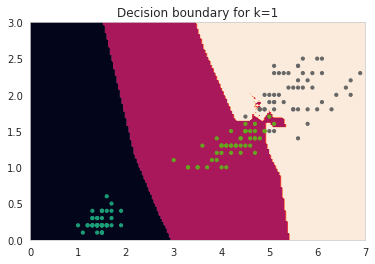

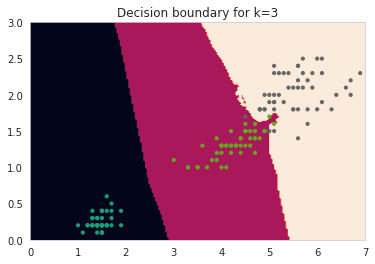

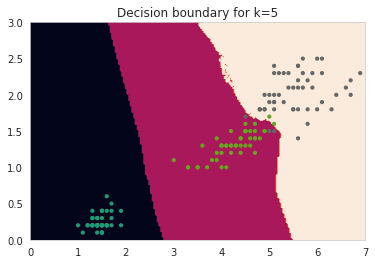

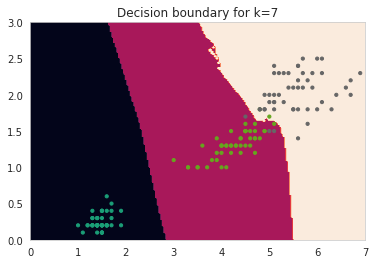

In [61]:
iris_x = np.array(iris_df[['petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

X_space = np.linspace(0,7,200)
Y_space = np.linspace(0,3,200)
mesh_x, mesh_y = np.meshgrid(X_space, Y_space)
print(mesh_x.reshape(-1,1).shape, mesh_y.shape)
target_names, iris_y_ids = np.unique(iris_y, return_inverse=True)
mesh_data = np.hstack([mesh_x.reshape(-1, 1), mesh_y.reshape(-1, 1)])
print(mesh_data.shape)
preds = KNN(iris_x, iris_y_ids, mesh_data, [1, 3, 5, 7])
for k, preds_k in preds.items():
    plt.figure()
    plt.title(f"Decision boundary for k={k}")
    plt.contourf(mesh_x, mesh_y, preds_k.reshape(200,200), extend='both')
    plt.scatter(iris_x[:,0], iris_x[:,1], c=iris_y_ids, s=10, cmap='Dark2')

In [62]:
def err_rates(preds, test_Y):
    ret = {}
    for k, preds_k in  preds.items():
        ret[k] = np.sum(preds_k.ravel()!=test_Y)/test_Y.shape[0]
    return ret

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


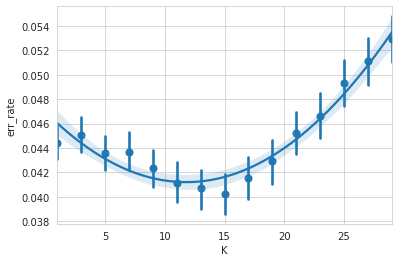

In [63]:
iris_x = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])
ks = range(1, 30, 2)
results = []
rest = np.arange(0, 150, 1)
for _rep in tqdm_notebook(range(1000)):
    #TODO
    # Use np.random.randint to get training indices
    # The find all unselected indices to form a test set 
    train_idx = np.random.randint(0, 150, 150)
    test_idx = np.setdiff1d(rest, train_idx)

    #TODO: apply your kNN classifier to data subset
    preds = KNN(iris_x[train_idx], iris_y[train_idx], iris_x[test_idx], ks)
    errs = err_rates(preds, iris_y[test_idx])
    
    for k, errs_k in errs.items():
        results.append({'K':k, 'err_rate': errs_k})

# results_df will be a data_frame in long format
results_df = pd.DataFrame(results)

plt.figure()
sns.regplot(x='K', y=results_df.err_rate, data=results_df, x_estimator=np.mean, order=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


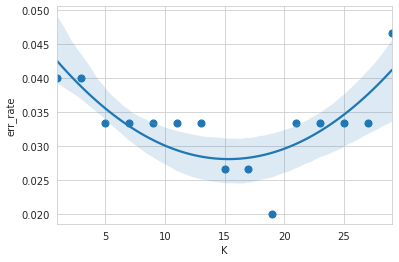

In [64]:
iris_x = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])

for _rep in tqdm_notebook(range(1)):
    results2=[]
    errs = {}
    for i in range(1, 30, 2):
      errs[i] = 0
    #for t in tqdm_notebook(range(150)):
    for t in range(150):
      test_idx = t
      train_idx = np.setdiff1d(rest, np.array([test_idx]))
      preds = KNN(iris_x[train_idx], iris_y[train_idx], iris_x[test_idx].reshape(1,4), ks)
      for k, preds_k in  preds.items():
        if preds_k.ravel() != iris_y[t]:
          errs[k]+=1
    #print(errs)
    for k, errs_k in errs.items():
        results2.append({'K':k, 'err_rate': errs_k/150})

# results_df will be a data_frame in long format
results2_df = pd.DataFrame(results2)

plt.figure()
sns.regplot(x='K', y=results2_df.err_rate, data=results2_df, x_estimator=np.mean, order=2)


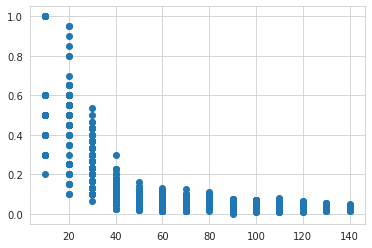

In [65]:
iris_x = np.array(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
iris_y = np.array(iris_df['target'])
train_sizes = np.arange(10, 141, 10)
ids = np.arange(0,150, 1)
ks = np.array([15])
results = {}

for size in train_sizes:
  errates = []
  for _rep in range(100):
    errs = 0
    dataset=np.random.choice(ids, size=size, replace=False)
    for i in range(size):
      trainids = np.setdiff1d(dataset, np.array([dataset[i]]))
      preds = KNN(iris_x[trainids], iris_y[trainids], iris_x[dataset[i]].reshape(1,4), ks)
      for k, preds_k in  preds.items():
        if preds_k.ravel() != iris_y[dataset[i]]:
          errs+=1
    errates.append(errs/size)
  results[size] = errates

  
keys = []
errors = []
for size in train_sizes:
  keys.append(np.full(100, size))
  errors.append(results[size])

keys = np.array(keys)
errors = np.array(errors)

plt.scatter(keys, errors)


In [66]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']
    
mnist_train_data_uint8 = mnist_full_train_data_uint8[:50000]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:50000]
mnist_valid_data_uint8 = mnist_full_train_data_uint8[50000:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[50000:]

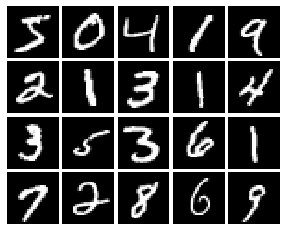

In [67]:
plot_mat(mnist_train_data_uint8[:20, None], cmap='gray')

In [68]:
def batched_KNN(train_X, train_Y, test_X, ks, verbose=False, batch_size=200):
    all_preds = {k: [] for k in ks}
    for i in tqdm(range(0, test_X.shape[0], batch_size)):
        batch_X = test_X[i:i + batch_size]
        
        # TODO: run KNN on the batch and save the predictions
        for k in all_preds.keys():
          preds = KNN(train_X, train_Y, batch_X, ks)
        # TODO: combine predictions from batches
          all_preds[k] = np.concatenate((all_preds[k], preds[k].ravel()))
    return all_preds

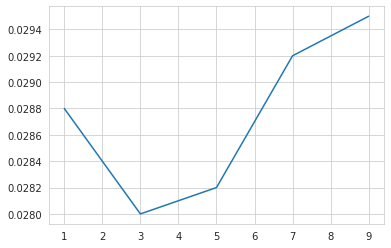

In [69]:
ks = [1, 3, 5, 7, 9]
mnist_validation_preds = batched_KNN(
    mnist_train_data_uint8.astype('float32').reshape(-1, 28*28), mnist_train_labels_int64,
    mnist_valid_data_uint8.astype('float32').reshape(-1, 28*28), ks)

mnist_validation_errs = err_rates(mnist_validation_preds, mnist_valid_labels_int64)
plt.plot(ks, [mnist_validation_errs[k] for k in ks])

In [70]:
best_K = 3

mnist_test_preds = batched_KNN(
    mnist_full_train_data_uint8.astype('float32').reshape(-1, 28*28), 
    mnist_full_train_labels_int64,
    mnist_test_data_uint8.astype('float32').reshape(-1, 28*28), 
    [best_K])

mnist_test_errs = err_rates(mnist_test_preds, mnist_test_labels_int64)
print(f"\n\nWhen k={best_K} the test error rate is {mnist_test_errs[best_K] * 100.0:.1f}%%")




When k=3 the test error rate is 2.9%%
